In [1]:
import cv2
import os
import pickle
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [14]:
headshots_folder_name = 'photos'

In [17]:
# dimension of images
image_width = 224
image_height = 224

# for detecting faces
facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# set the directory containing the images
images_dir = os.path.join(".", headshots_folder_name)
print(images_dir)

.\photos


dhoni
[[505 160 265 265]]


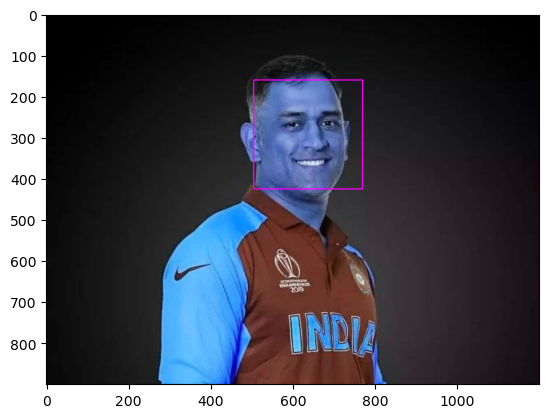

dhoni
[[278  99 294 294]]


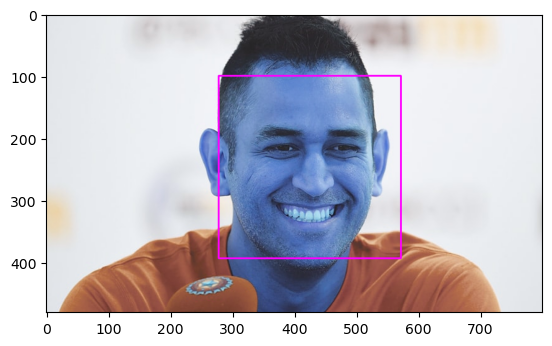

dhoni
[[832 498  60  60]]


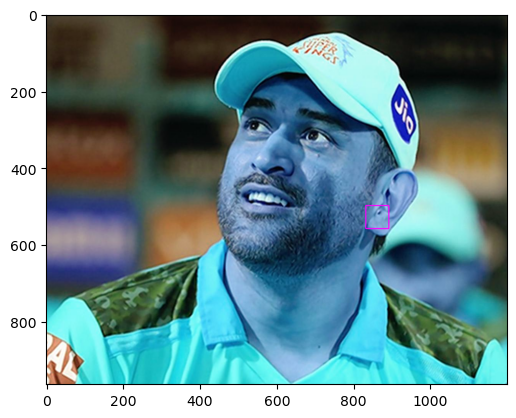

dhoni
[[349 156 552 552]]


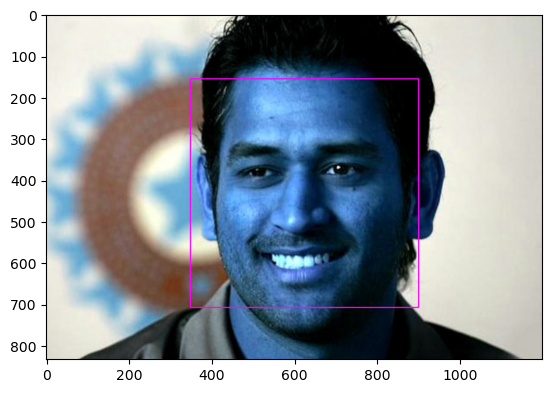

dhoni
[[498 128 347 347]]


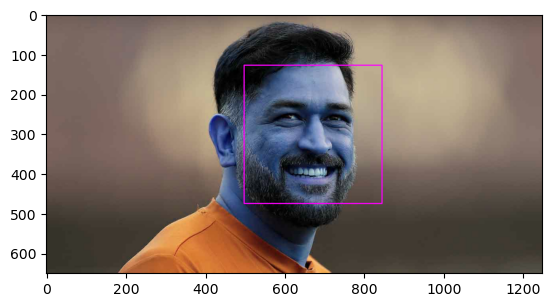

dhoni
[[245  85 257 257]
 [379 415  88  88]]
---Photo skipped---

dhoni
[[1278  537 1269 1269]
 [2713 2694   70   70]
 [ 537 2754  208  208]
 [2057 3125   55   55]]
---Photo skipped---

dhoni
[[273  87 269 269]]


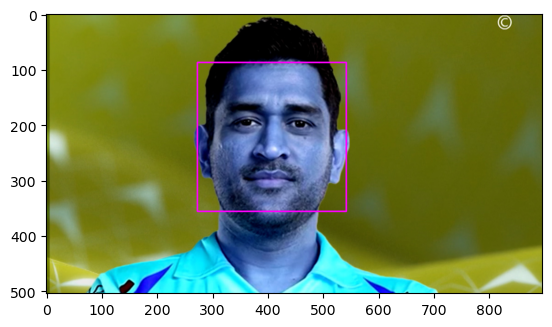

dhoni
[[340  95 289 289]]


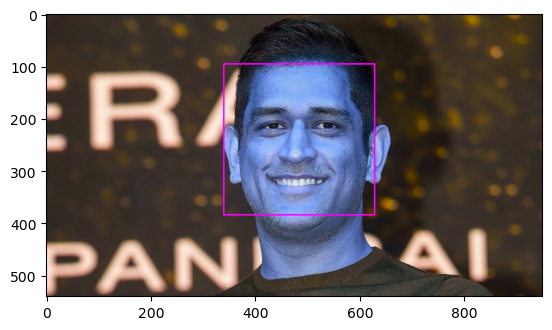

dhoni
[[106 125 286 286]]


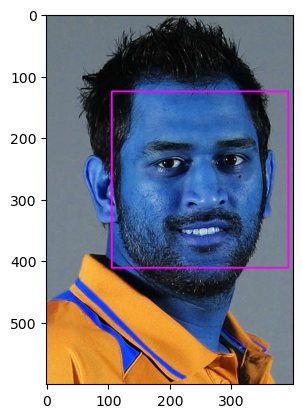

dhoni
[[242  96 238 238]]


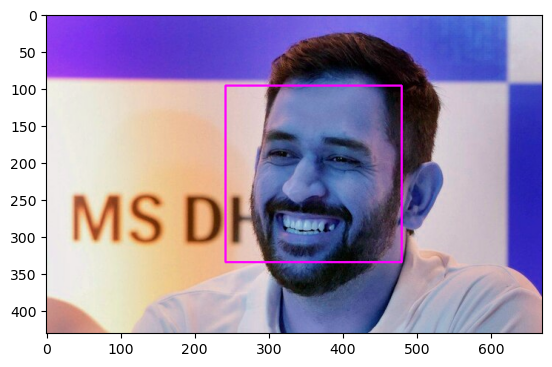

dhoni
[[ 47 108 252 252]]


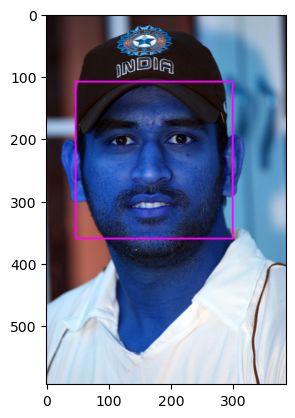

kohli
[[217  60 224 224]]


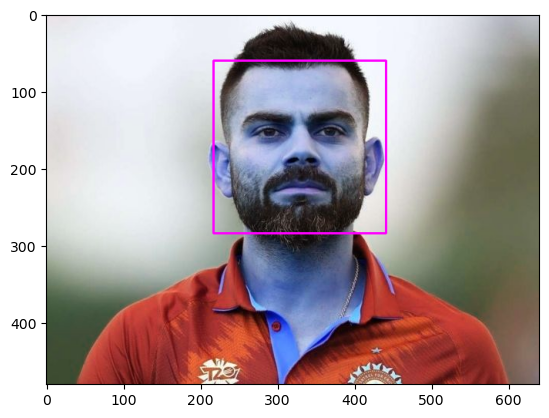

kohli
[[275 148 307 307]]


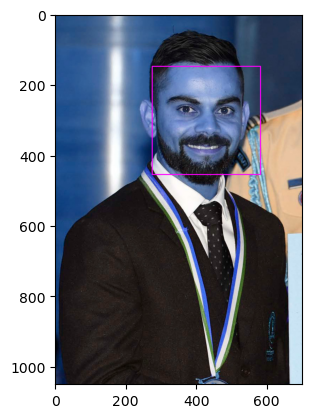

kohli
[[637 156 196 196]]


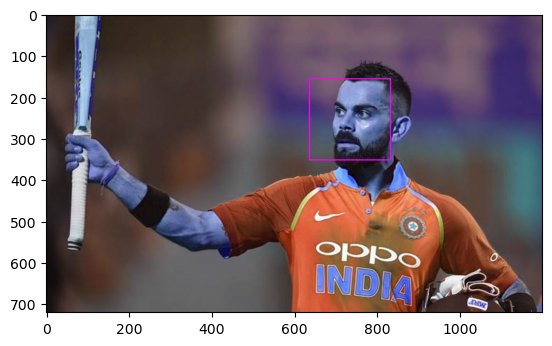

kohli
[[ 351  181  459  459]
 [ 381 1169  184  184]]
---Photo skipped---

kohli
[[552 281  59  59]
 [227 119 304 304]]
---Photo skipped---

kohli
[[289 168 441 441]]


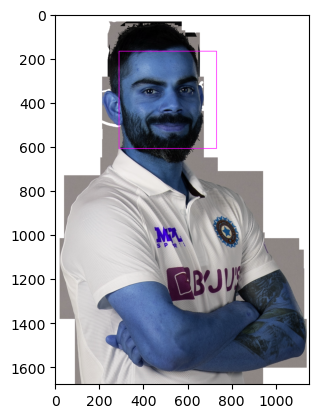

kohli
[[ 99  54 132 132]]


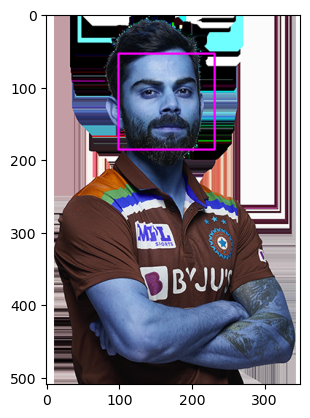

kohli
[[114 197 463 463]]


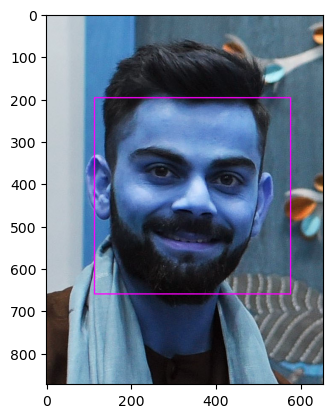

kohli
[[ 38  61 106 106]]


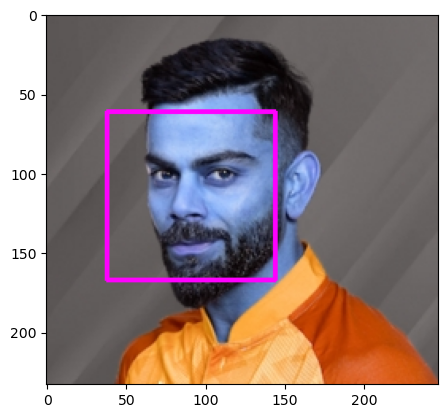

kohli
[[ 73  41 124 124]]


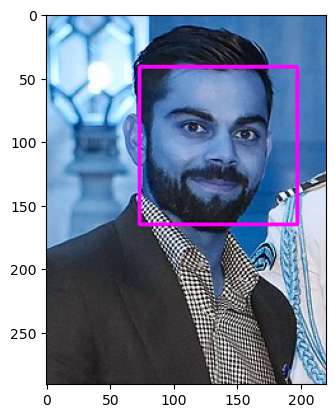

kohli
[[275 148 307 307]]


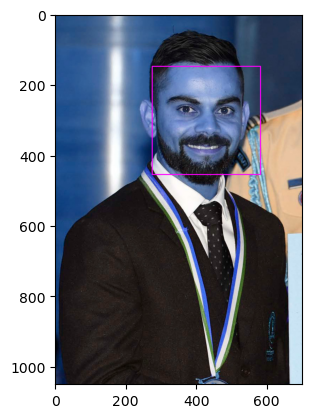

.ipynb_checkpoints
[[275 148 307 307]]


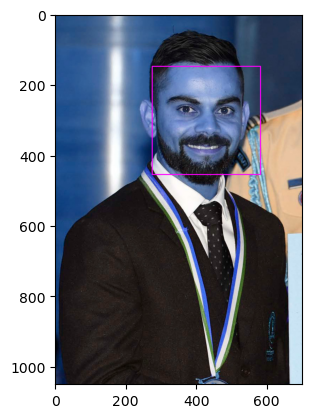

.ipynb_checkpoints
[[552 281  59  59]
 [227 119 304 304]]
---Photo skipped---

.ipynb_checkpoints
[[ 99  54 132 132]]


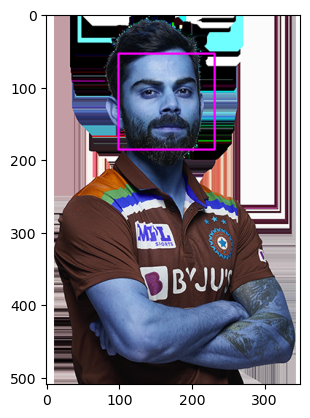

.ipynb_checkpoints
[[114 197 463 463]]


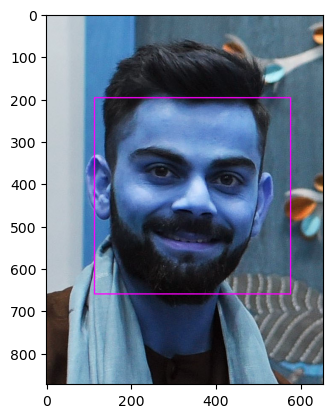

tata
[[531 262 686 686]]


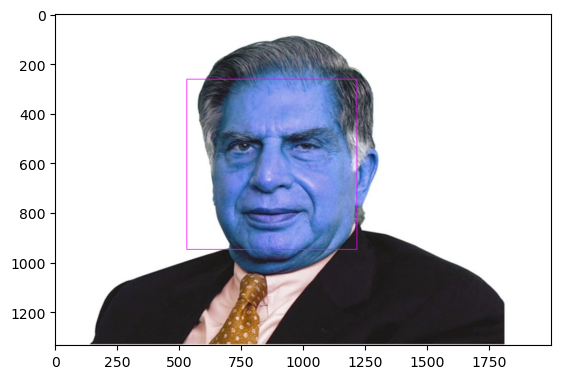

tata
[[379 119 175 175]]


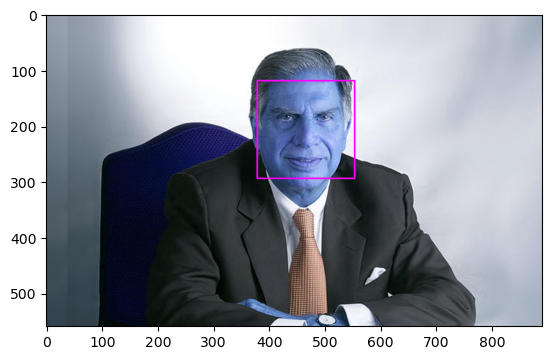

tata
[[184  77 188 188]]


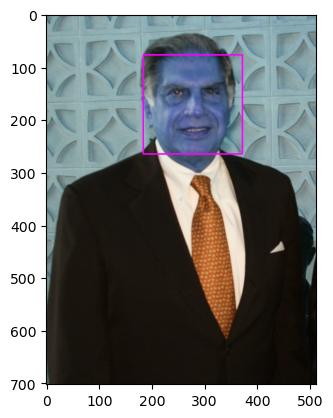

tata
[[132 127 370 370]]


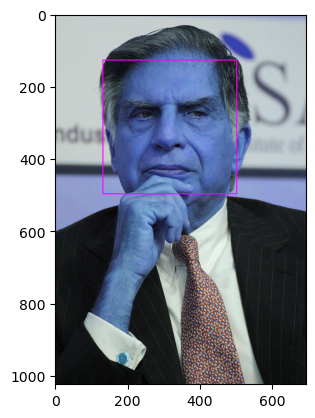

tata
[[233  60 231 231]]


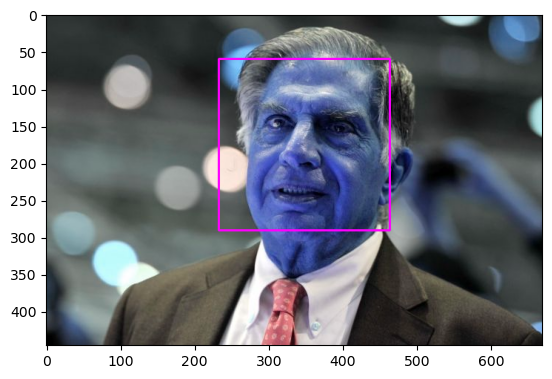

tata
[[459 218 497 497]]


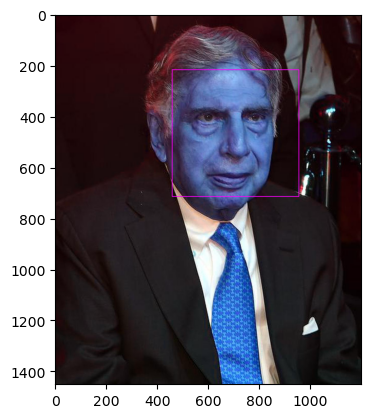

tata
[[469 197 357 357]]


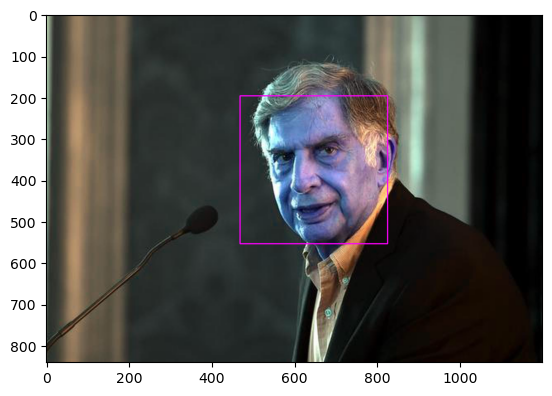

tata
[[432 107 258 258]]


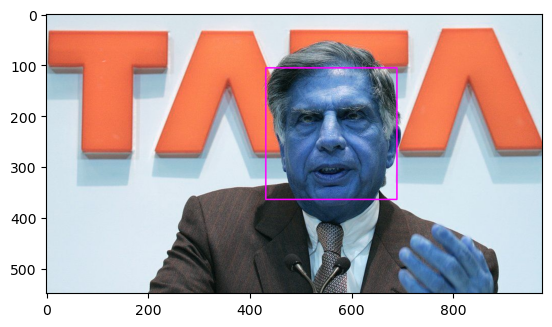

tata
[[443 410  50  50]
 [267  59 130 130]
 [416 331 100 100]]
---Photo skipped---

tata
[[149  69 186 186]]


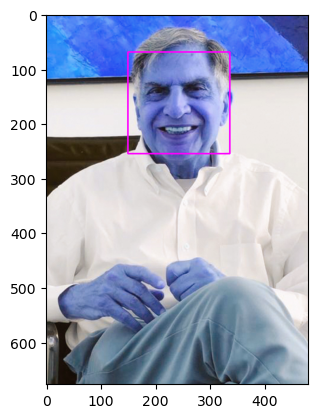

tata
[[ 17  11 190 190]]


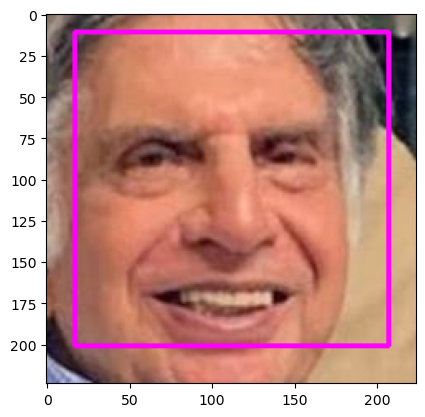

.ipynb_checkpoints
[[531 262 686 686]]


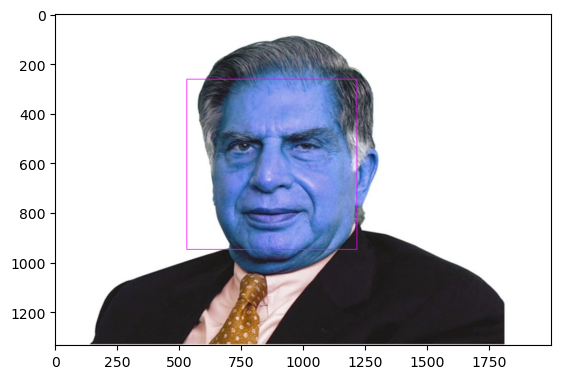

.ipynb_checkpoints
[[379 119 175 175]]


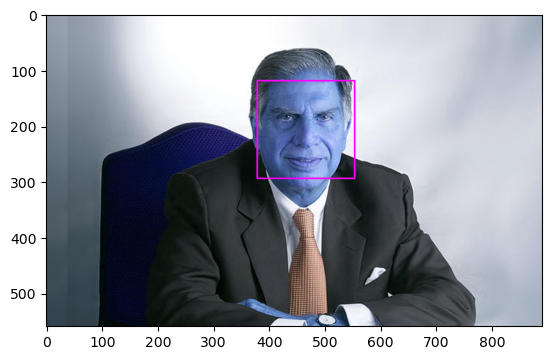

.ipynb_checkpoints
[[184  77 188 188]]


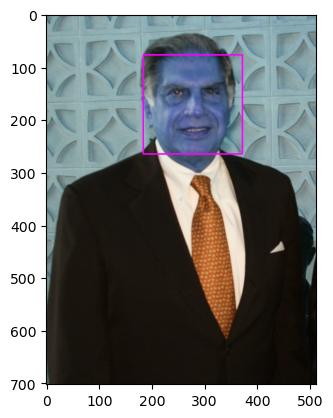

.ipynb_checkpoints
[[233  60 231 231]]


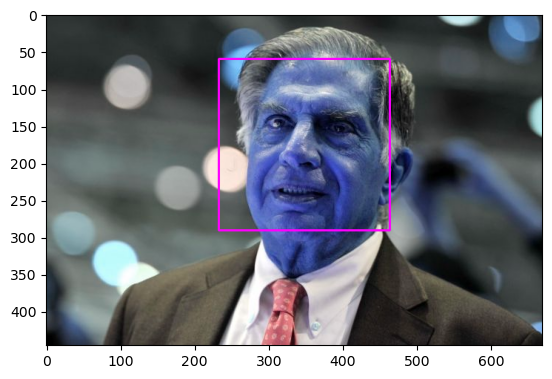

.ipynb_checkpoints
[[469 197 357 357]]


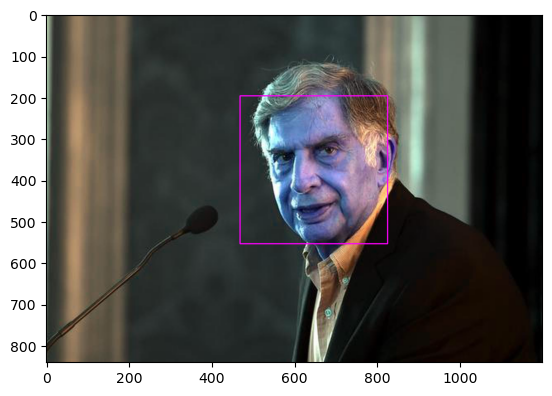

.ipynb_checkpoints
[[432 107 258 258]]


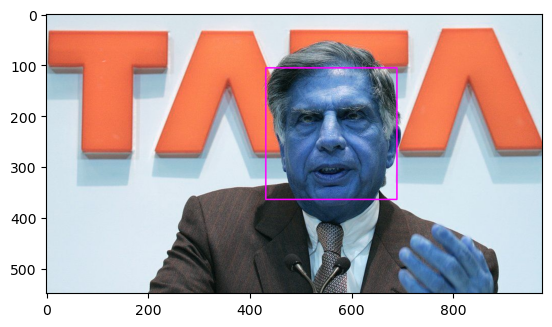

.ipynb_checkpoints
[[149  69 186 186]]


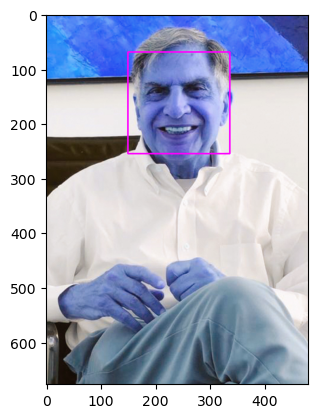

.ipynb_checkpoints
[[ 17  11 190 190]]


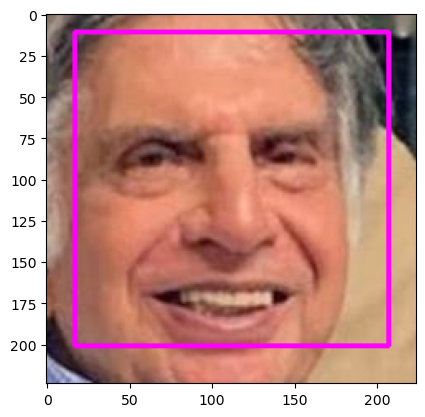

In [23]:
current_id = 0
label_ids = {}

# iterates through all the files in each subdirectories
for root, _, files in os.walk(images_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
        # path of the image
            path = os.path.join(root, file)
            # get the label name (name of the person)
            label = os.path.basename(root).replace(" ", ".").lower()
            print(label)
            # add the label (key) and its number (value)
            if not label in label_ids:
                label_ids[label] = current_id
                current_id += 1

            # load the image
            imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
            image_array = np.array(imgtest, "uint8")

            # get the faces detected in the image
            faces = facecascade.detectMultiScale(imgtest,scaleFactor=1.1, minNeighbors=5)
            print(faces)
            # if not exactly 1 face is detected, skip this photo
            if len(faces) != 1:
                print(f'---Photo skipped---\n')
                # remove the original image
                os.remove(path)
                continue
            # save the detected face(s) and associate
            # them with the label
            for (x_, y_, w, h) in faces:

                # draw the face detected
                face_detect = cv2.rectangle(imgtest,(x_, y_),(x_+w, y_+h),(255, 0, 255), 2)
                plt.imshow(face_detect)
                plt.show()

                # resize the detected face to 224x224
                size = (image_width, image_height)

                # detected face region
                roi = image_array[y_: y_ + h, x_: x_ + w]

                # resize the detected head to target size
                resized_image = cv2.resize(roi, size)
                image_array = np.array(resized_image, "uint8")

                # remove the original image
                # os.remove(path)

                # replace the image with only the face
                im = Image.fromarray(image_array)
                im.save(path)
            
           

In [25]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam


In [26]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
'./photos',
target_size=(224,224),
color_mode='rgb',
batch_size=32,
class_mode='categorical',
shuffle=True)


Found 54 images belonging to 3 classes.


In [28]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
NO_CLASSES = len(train_generator.class_indices.values())

In [31]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='vgg16',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face


580070376/580070376 [==============================] - 897s 2us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                  

In [33]:
base_model = VGGFace(include_top=False,
model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers


58909280/58909280 [==============================] - 85s 1us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                     

In [55]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.inputs, outputs=preds)
model.summary()
print(len(model.layers))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [56]:

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True


In [57]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [59]:
model.fit(train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)


Epoch 1/20
2/2 [==============================] - 11s 6s/step - loss: 1.0208 - accuracy: 0.6667
Epoch 2/20
2/2 [==============================] - 11s 7s/step - loss: 0.6114 - accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 11s 4s/step - loss: 0.2019 - accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 10s 6s/step - loss: 0.0230 - accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 11s 4s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 11s 6s/step - loss: 1.7900e-04 - accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 11s 4s/step - loss: 2.5132e-05 - accuracy: 1.0000
Epoch 8/20
2/2 [==============================] - 11s 5s/step - loss: 4.4284e-06 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 11s 7s/step - loss: 1.2473e-06 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 10s 4s/step - loss: 4.4814e-07 - accuracy: 1.0000
Epoch 11/20
2/2 [==

In [60]:
# creates a HDF5 file
model.save(
    'transfer_learning_trained' +
    '_face_cnn_model.h5')


In [62]:
from tensorflow.keras.models import load_model

# deletes the existing model
del model

# returns a compiled model identical to the previous one
model = load_model(
    'transfer_learning_trained' +
    '_face_cnn_model.h5')


In [63]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)


{0: 'dhoni', 1: 'kohli', 2: 'tata'}


In [64]:
# save the class dictionary to pickle
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)
